In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

c:\users\dipanshu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\dipanshu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

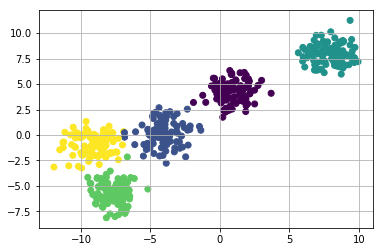

In [9]:
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [15]:
k=5

color = ["green", "red","blue","yellow","orange"]

clusters={}
for i in range(k):
    center = 10*(2*np.random.random((x.shape[1],))-1)
    
    
    points=[]
    
    cluster ={
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster


In [16]:
clusters

{0: {'center': array([-0.63374755,  5.39998154]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 3.57464397, -3.34688616]),
  'points': [],
  'color': 'red'},
 2: {'center': array([-2.90224053,  4.65948201]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ 6.79906203, -7.17692051]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-1.06964441, -1.4605365 ]),
  'points': [],
  'color': 'orange'}}

In [17]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [22]:
def assignPointToClusterss(clusters):
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]
    
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
def updateClusters(clusters):
    pass
    
def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="X")

(198, 2)
(0,)
(62, 2)
(0,)
(240, 2)


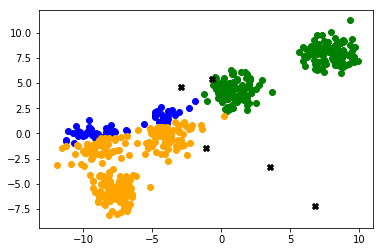

In [23]:
plotClusters(clusters)